In [78]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
import pydot
import matplotlib.pyplot as plt
import datetime

In [79]:
df = pd.read_csv('../Summer_2019_Projects/pollution.csv')
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [80]:
# the dimensions of the data
# 43284 data values
# 13 different features
shape = df.shape
print(shape)

(43824, 13)


In [81]:
# statistical information about the data
df.describe()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
count,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,41757.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,21912.500000,2012.000000,6.523549,15.727820,11.500000,98.613215,1.817246,12.448521,1016.447654,23.889140,0.052734,0.194916
std,12651.043435,1.413842,3.448572,8.799425,6.922266,92.050387,14.433440,12.198613,10.268698,50.010635,0.760375,1.415867
min,1.000000,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,10956.750000,2011.000000,4.000000,8.000000,5.750000,29.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,21912.500000,2012.000000,7.000000,16.000000,11.500000,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,32868.250000,2013.000000,10.000000,23.000000,17.250000,137.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,43824.000000,2014.000000,12.000000,31.000000,23.000000,994.000000,28.000000,42.000000,1046.000000,585.600000,27.000000,36.000000


In [82]:
# no need to do hot encoding to standardize the dates because the data set has already standardized the dates
# Separate the data into features and targets. 
# The target (label) is the thing that we are trying to predict which
# in this problem is the temperature
# I dropped the pm2.5, and cbwd columns because they contained strings which cannot be parsed into floats
# and cbwd because NAN are HUMUNGOUS in floats.
labels = np.array(df['TEMP'])
garbage = np.array(df['cbwd'])
garbage_NAN = np.array(df['pm2.5'])
df = df.drop('cbwd', axis = 1)
df = df.drop('TEMP', axis = 1)
df = df.drop('pm2.5', axis = 1)
features_list = list(df.columns)
df = np.array(df)

In [83]:
# Set up the data for training and for testing
# We split the data into training and target sets where use batch training
# because since we have a small data set, we can separate it for training and prediction
# Splitting the data set also allows for representation of all the data in the data set
# The splitting of the data is randomly seeded so the results can be reproducible

# X_TRAIN - The features for the training set
# Y_TRAIN - the labels or the thing we are trying to predict for the training set

# X_TEST - the features for testing on the data where we have not told the model what the features are4
# Y_TEST - the labels or the thing we are trying to predict where we have not shown the model what the actual labels are

# According to the sci-kit learn documentation, Decision Trees are an NP complete problem
# Since we currently have not proven the cases that P = NP or the case that P != NP we have 
# to use best approximations in the form of greedy algorithms and other techniques which are done under the hood of sci-kit learn
# Therefore (based on my understanding of the documentation, and I have no idea if this is right) random seeding helps to partly fix the problem
# with the NP complete problem for decision trees in the case of Random Forests and other ML algorithms / models that use decision trees
# As for what the size parameter is for (again based on my understanding of the documentation), it seems like the size parameter determines the size of the 
# decision trees for far deep subtrees can go after the root of the tree

X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(df, labels, test_size = 0.25, random_state = 42)


In [84]:
# Information about the different shapes of our data
print('Training Features Shape:', X_TRAIN.shape)
print('Training Labels Shape:', Y_TRAIN.shape)
print('Testing Features Shape:', X_TEST.shape)
print('Testing Labels Shape:', Y_TEST.shape)

Training Features Shape: (32868, 10)
Training Labels Shape: (32868,)
Testing Features Shape: (10956, 10)
Testing Labels Shape: (10956,)


In [85]:
# The base threshold
# We establish a base threshold so that we can some target threshold that we want out our model to be better than
# Since we do not really have something to compare two and since I have no idea about what the different features are
# (excluding, no, month, date, year, hour, and temp) I chose IWS
#print(features_list)
base_prediction = X_TEST[:, features_list.index('DEWP')]

# calculation for the base threshold error
base_error = abs(base_prediction - Y_TEST)

print('The error (don\'t really know if I calculated it right):', round(np.mean(base_error), 2))

# So if we used DEWP for the error, then we have to beat a base threshold error of 10.6
# This seems really high but for right now, we can't really tell because we haven't trained the model
# nor done any comparisons with the base error




The error (don't really know if I calculated it right): 10.6


In [86]:
# Training the model

# create a new random forest with 1000 trees
#print(features_list)
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

# Train the model on the training data
rf.fit(X_TRAIN, Y_TRAIN)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [87]:
# Make some predictions on the training data
predictions = rf.predict(X_TEST)

# Calculate the absolute error
error = abs(predictions - Y_TEST)
print(error)

# Mean Absolute Error (MAE for short)
print('Mean Absolute Error:', round(np.mean(error), 2), 'degrees')

# The mean absolute error is 1.1 which means we improved a significant amount compared to the
# original error which was 10.6 based on the way I was calculating the error above

[0.566 1.055 0.177 ... 0.418 0.218 1.945]
Mean Absolute Error: 1.1 degrees


In [88]:
# Calculate some performance metrics for the model
# Mean Absolute Percentae Error (MAPE)

mape = 100 * (error / Y_TEST)

#print(mape)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


Accuracy: -inf %.


c:\users\pranav\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


In [89]:
# Ranking the importance of all the labels
importances = list(rf.feature_importances_)
feature_importances = [(df, round(importance, 2)) for
                      df, importance in zip(features_list, importances)]
# Sort the importances
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: DEWP                 Importance: 0.6
Variable: PRES                 Importance: 0.14
Variable: month                Importance: 0.13
Variable: hour                 Importance: 0.07
Variable: No                   Importance: 0.03
Variable: day                  Importance: 0.02
Variable: Iws                  Importance: 0.01
Variable: year                 Importance: 0.0
Variable: Is                   Importance: 0.0
Variable: Ir                   Importance: 0.0


[None, None, None, None, None, None, None, None, None, None]

In [90]:
# create a better model that focuses on the two most important features which are DEWP and PRES
rf_most_important = RandomForestRegressor(n_estimators = 1000, random_state = 42)
important_indices = [features_list.index('DEWP'),
                    features_list.index('PRES')]
train_important = X_TRAIN[:,important_indices]
test_important = X_TEST[:, important_indices]

# Train the random forest
rf_most_important.fit(train_important, Y_TRAIN)

# predictions, error and metrics
prediction = rf_most_important.predict(test_important)
error = abs(prediction - Y_TEST)

print('Mean Absolute Error:', round(np.mean(error), 2), 'degrees.')

mape = np.mean(100 * (error / Y_TEST))
accuracy = 100 - mape

print('Accuracy:', round(accuracy, 2), '%')

Mean Absolute Error: 4.47 degrees.
Accuracy: -inf %


c:\users\pranav\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide


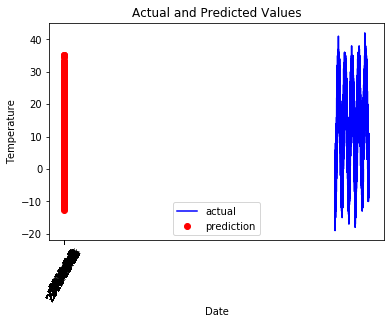

In [91]:
# Visualize the data and the predictions

# Dates of training values
months = df[:, features_list.index('month')]
days = df[:, features_list.index('day')]
years = df[:, features_list.index('year')]

# Take the data in the lists and convert them to date and time objects
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]

# The actual values and dates
actual_data = pd.DataFrame(data = {'date': dates, 'actual': labels})

# Dates of predictions
months = X_TEST[:, features_list.index('month')]
days = X_TEST[:, features_list.index('day')]
years = X_TEST[:, features_list.index('year')]

# column of dates
test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]

# predictions and dates
predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': prediction})

# Plot of the actual values
plt.plot(actual_data['date'], actual_data['actual'], 'b-', label = 'actual')

# Plot the predicted values
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()

# Graph labels
plt.xlabel('Date'); plt.ylabel('Temperature'); plt.title('Actual and Predicted Values');
